## Two-body Problem

In [ ]:
import Pkg 
Pkg.precompile()
# Pkg.instantiate()

In [1]:
using Plots; gr(legend=true); 
using LinearAlgebra
using BenchmarkTools
using Printf
using Revise
using CDDP

In [2]:
includet("../src/models/TwoBody.jl")
model = TwoBody()
x_dim, u_dim = model.x_dim, model.u_dim
tf = 8.162395951775
tN = 500
dt = (tf - 0.0)/tN
x_init = model.x_init
x_final = model.x_final;
;


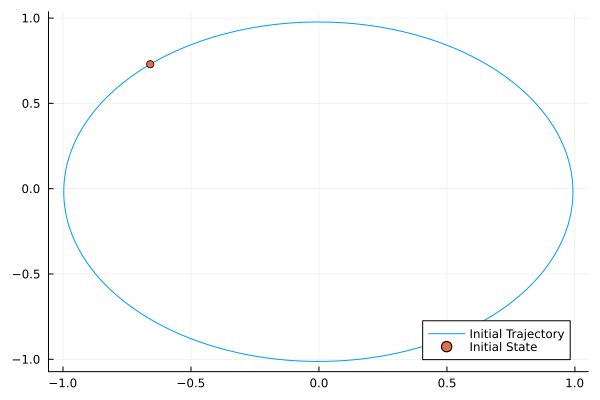

In [3]:
X0, U0 = initialize_trajectory(model)
plot(X0[1,:],X0[2,:],label="Initial Trajectory")
scatter!((x_init[1],x_init[2]),label="Initial State")

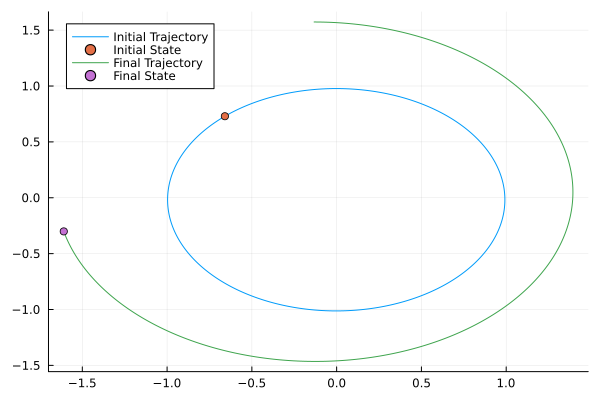

In [4]:
Xf, Uf = initialize_trajectory(model, x_init=x_final)
plot!(Xf[1,:],Xf[2,:],label="Final Trajectory")
scatter!((x_final[1],x_final[2]),label="Final State")

In [5]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(7, 7)
    # Q = zeros(6, 6)
    R = Diagonal(1e-1*[1; 1; 1])
    return transpose(x - x_ref) * Q * (x - x_ref) + transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal(1e+3*[1; 1; 1; 1; 1; 1; 1])
    # Qf = Diagonal(1e+4*[1; 1; 1; 1; 1; 1])
    return transpose(x - x_final) * Qf * (x - x_final)
end
;

In [6]:
prob = iLQRProblem(
    model, 
    tf, 
    tN, 
    dt, 
    x_dim, 
    u_dim, 
    ell_cost, 
    phi_cost, 
    model.f, 
    empty, 
    x_init, 
    x_final, 
    nothing)
    
sol = solve_ilqr(
    prob, 
    X=nothing, 
    U=nothing, 
    max_ite=100, 
    tol=1e-6,
    reg_param_x=1e-4, 
    reg_param_x_fact=10.0, 
    reg_param_x_lb=1e-20,
    reg_param_u=1e-2, 
    reg_param_u_fact=10.0,
    reg_param_u_lb=1e-20,
    line_search_steps = 5 .^ LinRange(0, -6, 30))
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective 
                


0       2302.211129,  
                
1       757.212121,  
                


2       535.463643,  
                
3       532.092068,  
                


4       466.677055,  
                
5       426.768529,  
                


6       245.507646,  
                
7       100.826493,  
                


8       75.505845,  
                
9       20.871630,  
                


iter    objective 
                
10       14.969214,  
                


11       3.285103,  
                
12       0.803703,  
                


13       0.785585,  
                
14       0.778261,  
                


15       0.774073,  
                
16       0.771480,  
                


17       0.769773,  
                
18       0.768591,  
                


19       0.767741,  
                
iter    objective 
                


20       0.767109,  
                
21       0.766626,  
                


22       0.766248,  
                
23       0.765948,  
                


24       0.765705,  
                
25       0.765505,  
                


26       0.765338,  
                
27       0.765199,  
                


28       0.765080,  
                
29       0.764978,  
                


iter    objective 
                
30       0.764890,  
                


31       0.764814,  
                
32       0.764747,  
                


33       0.764688,  
                
34       0.764636,  
                


35       0.764589,  
                
36       0.764548,  
                


37       0.764511,  
                
38       0.764477,  
                


39       0.764447,  
                
iter    objective 
                


40       0.764419,  
                
41       0.764394,  
                


42       0.764371,  
                
43       0.764351,  
                


44       0.764331,  
                
45       0.764314,  
                


46       0.764298,  
                
47       0.764283,  
                


48       0.764269,  
                
49       0.764256,  
                


iter    objective 
                
50       0.764244,  
                


51       0.764233,  
                
52       0.764223,  
                


53       0.764213,  
                
54       0.764205,  
                


55       0.764196,  
                
56       0.764188,  
                


57       0.764181,  
                
58       0.764174,  
                


59       0.764168,  
                
iter    objective 
                


60       0.764162,  
                
61       0.764156,  
                


62       0.764151,  
                
63       0.764146,  
                


64       0.764142,  
                
65       0.764137,  
                


66       0.764133,  
                
67       0.764129,  
                


68       0.764125,  
                
69       0.764122,  
                


iter    objective 
                
70       0.764119,  
                


71       0.764115,  
                
72       0.764113,  
                


73       0.764110,  
                
74       0.764107,  
                


75       0.764105,  
                
76       0.764102,  
                


77       0.764100,  
                
78       0.764098,  
                


79       0.764096,  
                
iter    objective 
                


80       0.764094,  
                
81       0.764092,  
                


82       0.764090,  
                
83       0.764089,  
                


84       0.764087,  
                
85       0.764086,  
                


86       0.764084,  
                
87       0.764083,  
                


88       0.764082,  
                
89       0.764080,  
                


iter    objective 
                
90       0.764079,  
                


91       0.764078,  
                
92       0.764077,  
                


93       0.764076,  
                
94       0.764075,  
                


95       0.764074,  
                
96       0.764073,  
                


97       0.764073,  
                
98       0.764072,  
                


**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


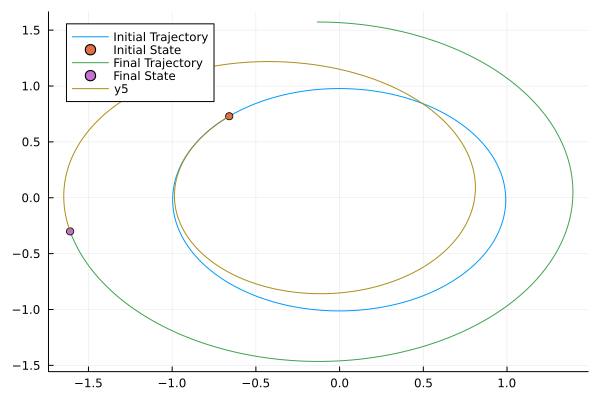

In [7]:
X_arr = Array{Float64}(undef, x_dim, tN+1)

for t in 1:tN+1
    X_arr[:,t] = X_ilqr((t-1)*dt)
end
plot!(X_arr[1,:], X_arr[2,:])

## CDDP Solver

In [ ]:
function cost(
    x::Vector,
    u::Vector,
)
    x0 = [45; 135]
    r_scale = 200

    return [
        1e-0 * (20 / r_scale - norm(x[1:2] - x0 / r_scale))
        1e-0 * (10 / r_scale - norm(x[1:2]))
    ]
end
λ_dim = 2

In [ ]:
prob = CDDPProblem(model, tf, tN, dt, x_dim, u_dim, λ_dim, ell_cost, phi_cost, model.f!, x_init, x_final, c, empty, nothing);
# sol = solve_cddp(prob,reg_param1=1e-2,reg_param2=1e-2,μip=1e-10, max_ite=10, verbose=true) 
# sol = solve_cddp(prob, X=X_ilqr, U=U_ilqr,max_ite=20); 
sol = solve_cddp(prob, X=X_ilqr, U=U_ilqr, reg_param1=1e-4,reg_param2=1e-4,μip=1e-8,max_ite=10); 
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_cddp, U_cddp, J_cddp, gains_cddp = sol.X, sol.U, sol.J, sol.gains;